# Compute Drawdowns

In [1]:
import numpy as np
import pandas as pd

In [2]:
import sys
import os

In [3]:
sys.path.append(os.path.abspath("../finance-ml-mod1"))

In [4]:
me_m = pd.read_csv("../finance-ml-data/Portfolios_Formed_on_ME_monthly_EW.csv", 
                  header=0,
                  index_col=0,
                  parse_dates=True,
                  na_values=-99.99)

/var/folders/ym/rlg1qq9j3c53t7sp5vx71h1c0000gn/T/ipykernel_93781/2325816311.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  me_m = pd.read_csv("../finance-ml-data/Portfolios_Formed_on_ME_monthly_EW.csv",


In [5]:
rets = me_m[['Lo 10','Hi 10']]

In [6]:
rets.columns = ['SmallCap','LargeCap']

In [7]:
rets = rets/100

<Axes: >

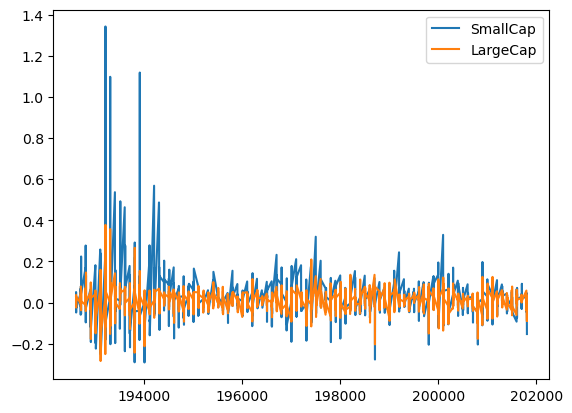

In [8]:
rets.plot.line()

In [9]:
rets.head()

,SmallCap,LargeCap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


In [10]:
rets.index

Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702, 192703,
       192704,
       ...
       201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810, 201811,
       201812],
      dtype='int64', length=1110)

In [11]:
rets.index = pd.to_datetime(rets.index, format='%Y%m')

In [12]:
rets.index

DatetimeIndex(['1926-07-01', '1926-08-01', '1926-09-01', '1926-10-01',
               '1926-11-01', '1926-12-01', '1927-01-01', '1927-02-01',
               '1927-03-01', '1927-04-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', length=1110, freq=None)

In [13]:
rets.index = rets.index.to_period('M')

In [14]:
rets.index

PeriodIndex(['1926-07', '1926-08', '1926-09', '1926-10', '1926-11', '1926-12',
             '1927-01', '1927-02', '1927-03', '1927-04',
             ...
             '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
             '2018-09', '2018-10', '2018-11', '2018-12'],
            dtype='period[M]', length=1110)

In [15]:
rets.head()

,SmallCap,LargeCap
1926-07,-0.0145,0.0329
1926-08,0.0512,0.0370
1926-09,0.0093,0.0067
1926-10,-0.0484,-0.0243
1926-11,-0.0078,0.0270


# Compute Dradowns

1. Compute a wealth index
2. Compute previous peaks
3. Compute drawdown


In [16]:
wealth_index = 1000*(1+rets["LargeCap"]).cumprod()

In [17]:
wealth_index

1926-07    1.032900e+03
1926-08    1.071117e+03
1926-09    1.078294e+03
1926-10    1.052091e+03
1926-11    1.080498e+03
               ...     
2018-08    4.175915e+06
2018-09    4.212246e+06
2018-10    3.935501e+06
2018-11    4.035069e+06
2018-12    3.675948e+06
Freq: M, Name: LargeCap, Length: 1110, dtype: float64

In [18]:
wealth_index.head()

1926-07    1032.900000
1926-08    1071.117300
1926-09    1078.293786
1926-10    1052.091247
1926-11    1080.497711
Freq: M, Name: LargeCap, dtype: float64

<Axes: >

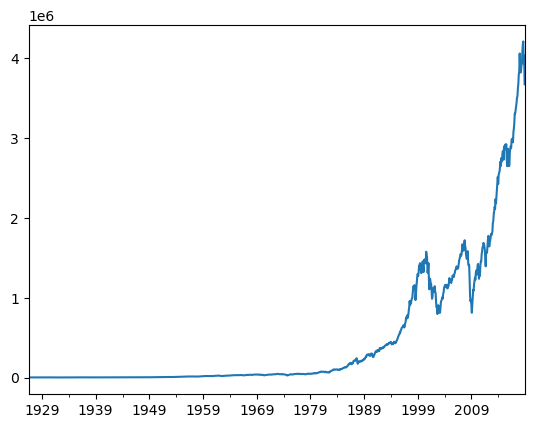

In [19]:
wealth_index.plot.line()

## Compute previous peaks

In [20]:
previous_peaks = wealth_index.cummax()

In [21]:
previous_peaks.head()

1926-07    1032.900000
1926-08    1071.117300
1926-09    1078.293786
1926-10    1078.293786
1926-11    1080.497711
Freq: M, Name: LargeCap, dtype: float64

<Axes: >

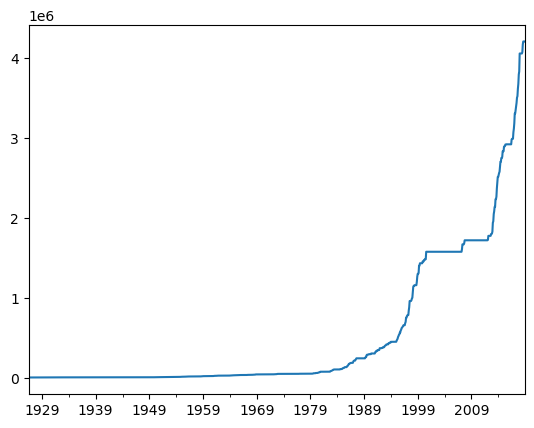

In [22]:
previous_peaks.plot.line()

In [23]:
## drawdown

In [24]:
drawdown = (wealth_index - previous_peaks)/previous_peaks

<Axes: >

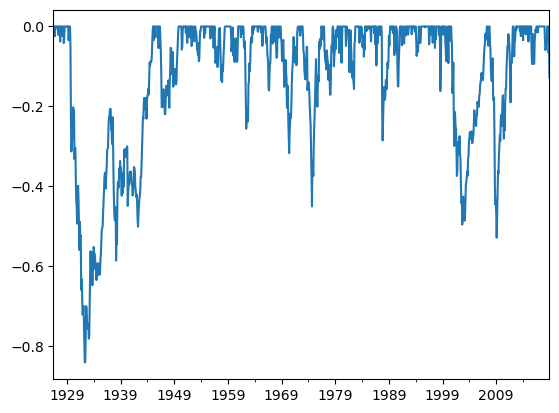

In [25]:
drawdown.plot()

In [31]:
drawdown.head()

1926-07    0.0000
1926-08    0.0000
1926-09    0.0000
1926-10   -0.0243
1926-11    0.0000
Freq: M, Name: LargeCap, dtype: float64

In [27]:
drawdown.min()

-0.8400375277943123

In [28]:
drawdown["1975":].min()

-0.5280945042309304

In [29]:
drawdown.idxmin()

Period('1932-05', 'M')

In [40]:
## function to compute drawdown, previous peak, etc.

In [43]:
def drawdown(series: pd.Series):
    """
    Takes a time series of asset returns
    Computes and returns a data frame that contains:
    1/ wealth index
    2/ previous peaks
    3/ percentage drawdowns
    """
    wealth_index = 1000*(1+series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks) / previous_peaks

    return pd.DataFrame({
        "Wealth": wealth_index,
        "Peaks": previous_peaks,
        "Drawdowns": drawdowns
    })

In [44]:
drawdown(rets['LargeCap']).head()

,Wealth,Peaks,Drawdowns
1926-07,1032.900000,1032.900000,0.0000
1926-08,1071.117300,1071.117300,0.0000
1926-09,1078.293786,1078.293786,0.0000
1926-10,1052.091247,1078.293786,-0.0243
1926-11,1080.497711,1080.497711,0.0000


In [54]:
drawdown(rets['LargeCap'])[['Wealth','Peaks']].head()

,Wealth,Peaks
1926-07,1032.900000,1032.900000
1926-08,1071.117300,1071.117300
1926-09,1078.293786,1078.293786
1926-10,1052.091247,1078.293786
1926-11,1080.497711,1080.497711


<Axes: >

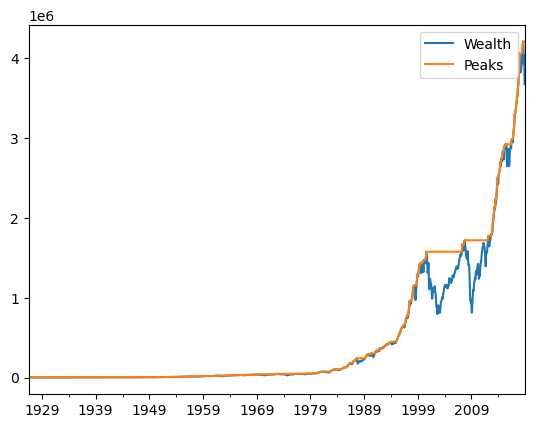

In [55]:
drawdown(rets['LargeCap'])[['Wealth','Peaks']].plot()

<Axes: >

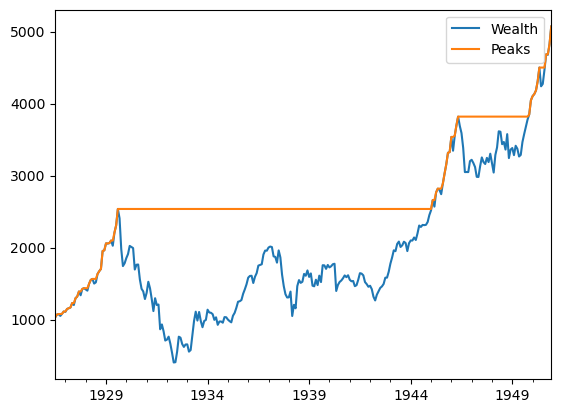

In [56]:
drawdown(rets['LargeCap'][:"1950"])[['Wealth','Peaks']].plot()

In [57]:
drawdown(rets['LargeCap']).head()

,Wealth,Peaks,Drawdowns
1926-07,1032.900000,1032.900000,0.0000
1926-08,1071.117300,1071.117300,0.0000
1926-09,1078.293786,1078.293786,0.0000
1926-10,1052.091247,1078.293786,-0.0243
1926-11,1080.497711,1080.497711,0.0000


In [58]:
drawdown(rets['LargeCap'])['Drawdowns'].min()

-0.8400375277943123

In [59]:
drawdown(rets['SmallCap'])['Drawdowns'].min()

-0.8330007793945303

In [61]:
drawdown(rets['SmallCap']["1940":])['Drawdowns'].min()

-0.7000596091967917

In [62]:
drawdown(rets['SmallCap']["1940":])['Drawdowns'].idxmin()

Period('1974-12', 'M')

In [63]:
drawdown(rets['SmallCap']["1975":])['Drawdowns'].min()

-0.6312068077252386

In [64]:
drawdown(rets['SmallCap']["1975":])['Drawdowns'].idxmin()

Period('2009-02', 'M')

In [65]:
drawdown(rets['LargeCap']["1975":])['Drawdowns'].min()

-0.5280945042309303

In [66]:
drawdown(rets['LargeCap']["1975":])['Drawdowns'].idxmin()

Period('2009-02', 'M')